## Data Preprocessing

In [1]:
# Import the numpy library for numerical operations
import numpy as np

# Import the pandas library for data manipulation and analysis
import pandas as pd

In [2]:
# Read the dataset from the specified URL into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
# Print the shape (number of rows and columns) of the DataFrame
print(df.shape)
# Display the first 5 rows of the DataFrame to inspect the data
print(df.head())

In [3]:
# Print a concise summary of the DataFrame, including index dtype, column dtypes, non-null values, and memory usage
print(df.info())

In [8]:
# Randomly sample 3 comments to inspect the data content
df.sample(3)['clean_comment'].values

In [15]:
# Calculate the number of missing (null) values in each column
df.isnull().sum()

In [16]:
# Filter and display rows where the 'clean_comment' column has missing values (NaN)
df[df['clean_comment'].isna()==True]

In [19]:
# Group null comments by category to check if they belong to a specific sentiment
df[df['clean_comment'].isna()]['category'].value_counts()

In [20]:
# Filter and display rows where the 'category' column has missing values (NaN)
df[df['category'].isna()]

In [23]:
# Drop rows with any missing values from the DataFrame in place
df.dropna(inplace=True)

In [24]:
# Check the shape of the DataFrame after dropping null values
df.shape

In [26]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

In [27]:
# Display the rows that are duplicates
df[df.duplicated()]

In [28]:
# Group duplicates by their content to see which comments are repeated most often
df[df.duplicated()].value_counts()

In [32]:
# Identify rows that are repeated (count > 1)
counts = df.value_counts()
duplicates_with_counts = counts[counts > 1]

# Display duplicate entries and their frequency
print(duplicates_with_counts)

In [33]:
# Remove duplicate rows from the DataFrame in place
df.drop_duplicates(inplace=True)

In [34]:
# Verify that there are no more duplicate rows
df.duplicated().sum()

In [36]:
# Filter and display rows where 'clean_comment' is an empty string after stripping whitespace
df[df['clean_comment'].str.strip()=='']

In [38]:
# Exclude rows where comments are empty or only whitespace
df = df[~(df['clean_comment'].str.strip()=='')]

In [ ]:
# Import the regular expression module
import re

# Define an exhaustive regex pattern to match URLs (http, https, ftp, www, etc.)
url_pattern = r'(?i)\b((?:https?://|ftp://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'

# Check for rows containing URLs in the 'clean_comment' column
rows_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True, na=False)]

# Print the number of rows with URLs
print(f"Number of rows with URLs: {len(rows_with_urls)}")
# Display the rows containing URLs
print(rows_with_urls)

In [ ]:
# Replace new line characters ('\n') with a space in the 'clean_comment' column to preserve word separation
df['clean_comment'] = df['clean_comment'].str.replace(r'\n', ' ', regex=True)

## EDA

category
 1    15771
 0    12772
-1     8250
Name: count, dtype: int64


<Axes: xlabel='category', ylabel='count'>

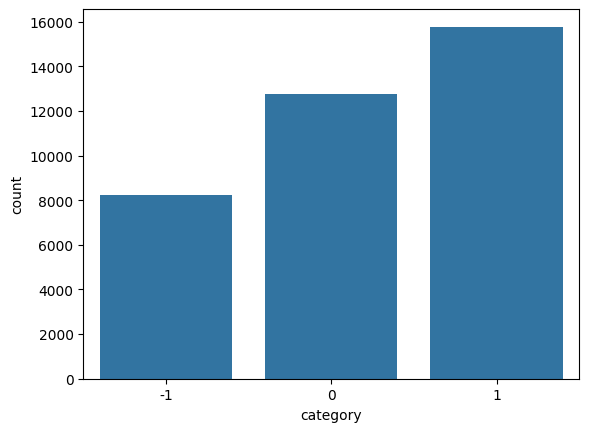

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the numerical distribution of sentiments across categories
print(df['category'].value_counts())

# Create a bar plot to visualize the count of each sentiment category
sns.countplot(data=df, x='category')

In [55]:
# Calculate the percentage distribution of each sentiment category
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [58]:
# Engineer a new feature 'word_count' by counting tokens in each comment
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

# Display the updated dataset columns
print(df.head())

                                       clean_comment  category  word_count
0  family mormon have never tried explain them th...         1          39
1  buddhism has very much lot compatible with chr...         1         196
2  seriously don say thing first all they won get...        -1          86
3  what you have learned yours and only yours wha...         0          29
4  for your own benefit you may want read living ...         1         112


In [59]:
# Generate summary statistics for the word count distribution
print(df['word_count'].describe())

count    36793.000000
mean        29.646645
std         56.648801
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64


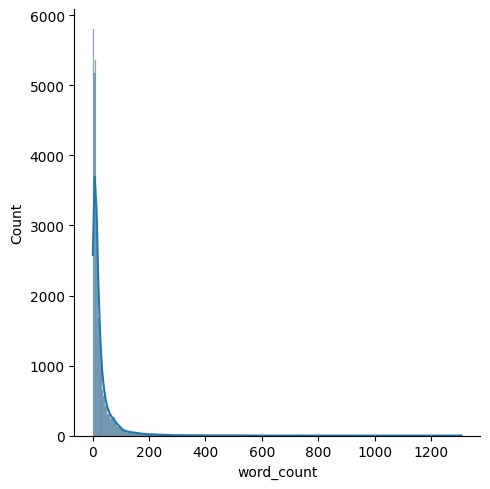

In [60]:
sns.displot(df['word_count'], kde=True)

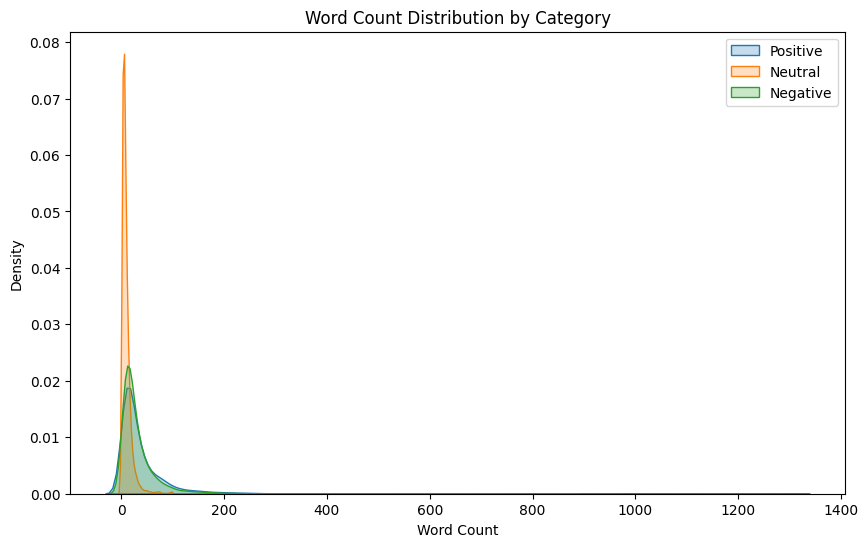

In [62]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['category']==1]['word_count'], label='Positive', fill=True)

sns.kdeplot(df[df['category']==0]['word_count'], label='Neutral', fill=True)

sns.kdeplot(df[df['category']==-1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Density")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Detailed Analysis: Word Count Distribution (KDE)



The Kernel Density Estimate (KDE) plot reveals the distribution of comment lengths across three sentiment categories:

- **High Frequency of Short Comments**: Most comments, regardless of sentiment, are relatively short (under 50 words).

- **Neutral Sentiment Tendency**: Neutral comments (category 0) exhibit a narrower distribution, suggesting they are consistently concise.

- **Positive & Negative Lengths**: Both positive (1) and negative (-1) sentiments show broader distributions with longer tails, indicating that expressive or emotional comments tend to be more verbose.

- **Overlapping Distributions**: The significant overlap suggests that sentence length alone is not a strong predictor of sentiment, though outliers (very long comments) are more common in emotional categories.

<Axes: ylabel='word_count'>

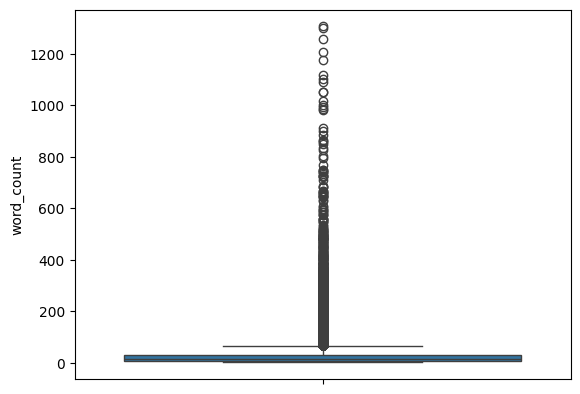

In [63]:
sns.boxplot(df['word_count'])

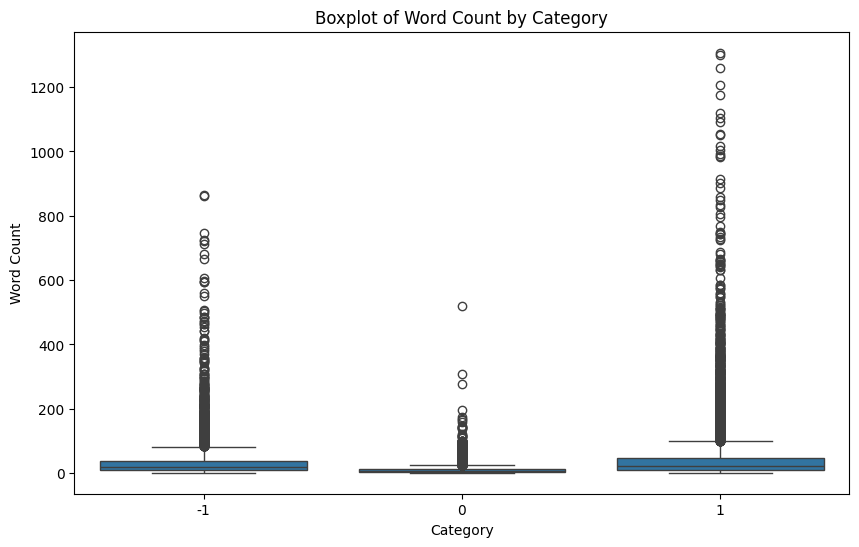

In [64]:
# Create a boxplot for the 'word_count' column categorized by the 'category'

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

### Detailed Analysis: Word Count Box Plot



The box plot provides a statistical overview of word counts per category:

- **Median Values**: The median word count for all categories hovers around 10-15 words, confirming that the typical YouTube comment in this dataset is brief.

- **Outliers**: Numerous outliers are present in all categories, representing "wall of text" comments. These are particularly prominent in the Positive and Negative categories.

- **Interquartile Range (IQR)**: The IQR is slightly larger for non-neutral comments, reflecting more variability in length when users are expressing a clear opinion.

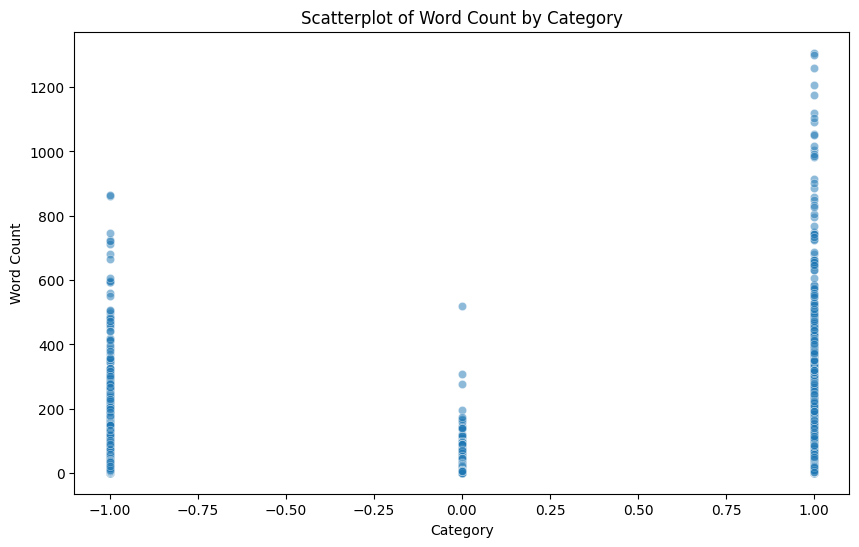

In [65]:
# Create a scatterplot 'category' and 'word_count'

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

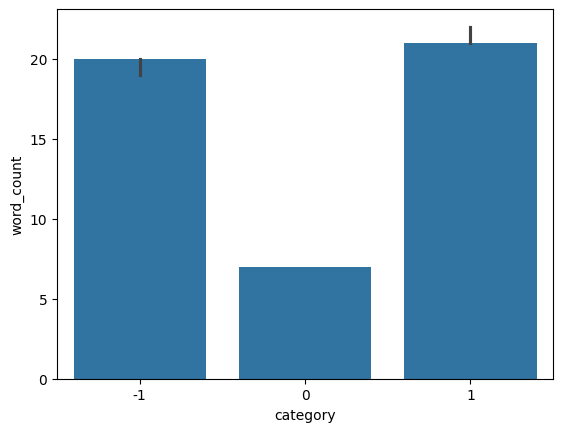

In [66]:
# Median Word counts among sentiments

sns.barplot(df, x='category', y='word_count', estimator='median')

In [68]:
from nltk.corpus import stopwords

# Download nltk stopwords, if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

print(len(stop_words))
print(stop_words)

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to C:\Users\Vipul
[nltk_data]     Goel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


198
{'out', 'doing', 'more', 'most', 'shan', "couldn't", "mustn't", 'this', 'any', 'to', "hadn't", 'aren', "wouldn't", "she'll", 'so', "wasn't", 'you', 'nor', 'm', 'doesn', 'he', 'd', "we'd", 'should', 'itself', 'had', 'but', 'or', 'again', 'has', 'than', 'her', 'between', 'in', 'we', 'isn', 'same', 'from', 'being', 'have', 'a', 'shouldn', 'our', 'its', 'both', 'just', 'if', 'about', "won't", 'are', 'why', 'am', "i'll", 'theirs', 'wouldn', 'yourself', 'yours', 'i', 'while', 'she', 'only', 'no', 'mightn', 'very', 't', 'where', 'such', 'himself', 'be', 'myself', 'is', 'into', 'of', 'haven', 'other', 's', 'y', 've', 'as', "haven't", "we'll", 'whom', 'couldn', "i've", 'ourselves', 'were', "you'd", 'after', "he's", 'did', 'll', 'which', "you've", 'the', 'down', "i'd", 'don', "don't", "they're", "you'll", 'o', 'weren', "should've", 'needn', 'will', 'ours', 'who', 'an', 'over', 'him', 'because', 'above', 'wasn', "that'll", 'my', "he'd", "we've", 'ma', 'now', 'been', 'ain', "doesn't", 'through

In [71]:
print(df.sample(5))

                                           clean_comment  category  \
30018  this masterstroke when abhinandan said jai hin...        -1   
16905  based complaint from marimuthu bjp district se...        -1   
32101   long mandir wahi bane they dont really give shit        -1   
32621             woh kaat raha hai log katwa rahey hain         0   
27944  photo slain terrorist circulated indian media ...         0   

       word_count  num_stop_words  
30018          24               8  
16905          16               7  
32101           9               1  
32621           8               0  
27944          18               1  


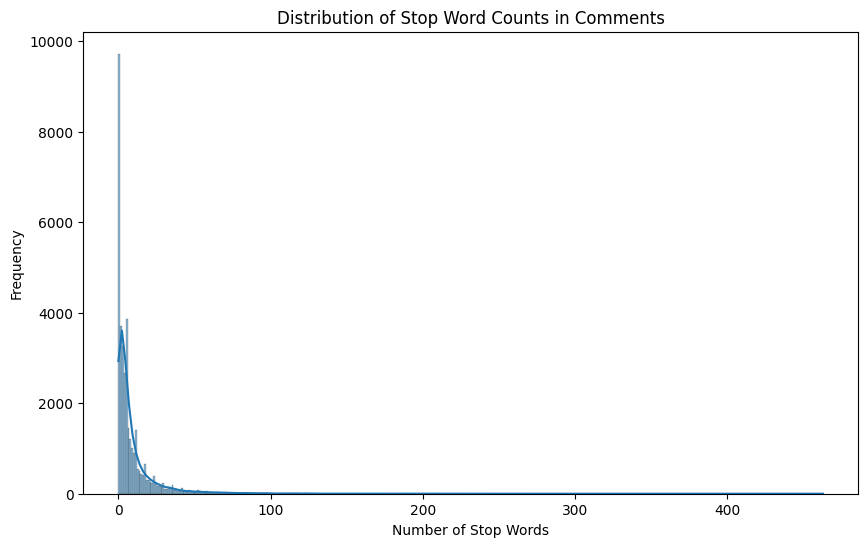

In [72]:
# Create a distribution plot (displot) for the 'num_stop_words' column

plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Counts in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

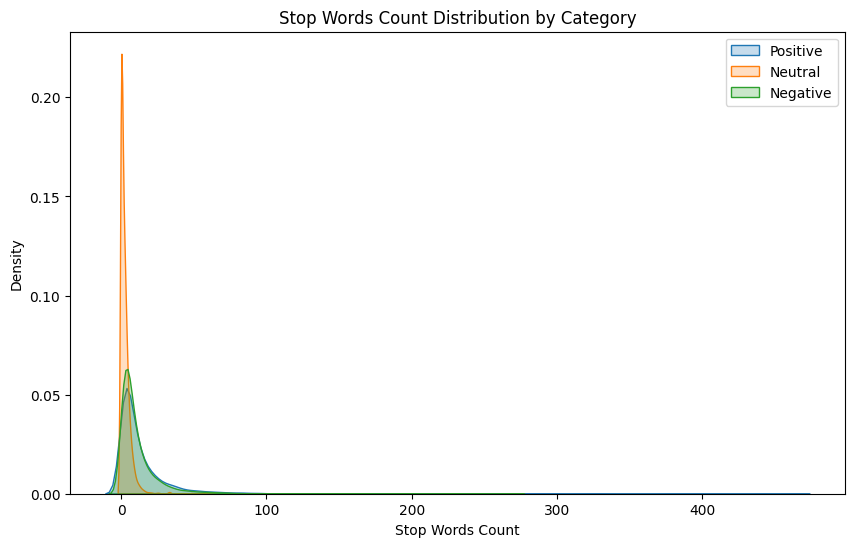

In [73]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['category']==1]['num_stop_words'], label='Positive', fill=True)

sns.kdeplot(df[df['category']==0]['num_stop_words'], label='Neutral', fill=True)

sns.kdeplot(df[df['category']==-1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title("Stop Words Count Distribution by Category")
plt.xlabel("Stop Words Count")
plt.ylabel("Density")

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

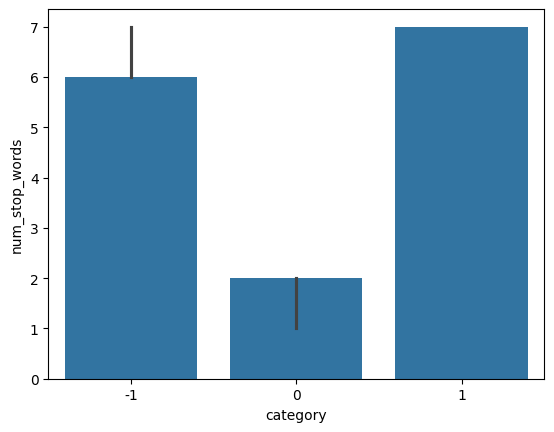

In [74]:
# Median Word Counts among sentiments

sns.barplot(df, x='category', y='num_stop_words', estimator='median')

C:\Users\Vipul Goel\AppData\Local\Temp\ipykernel_12284\1173889125.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


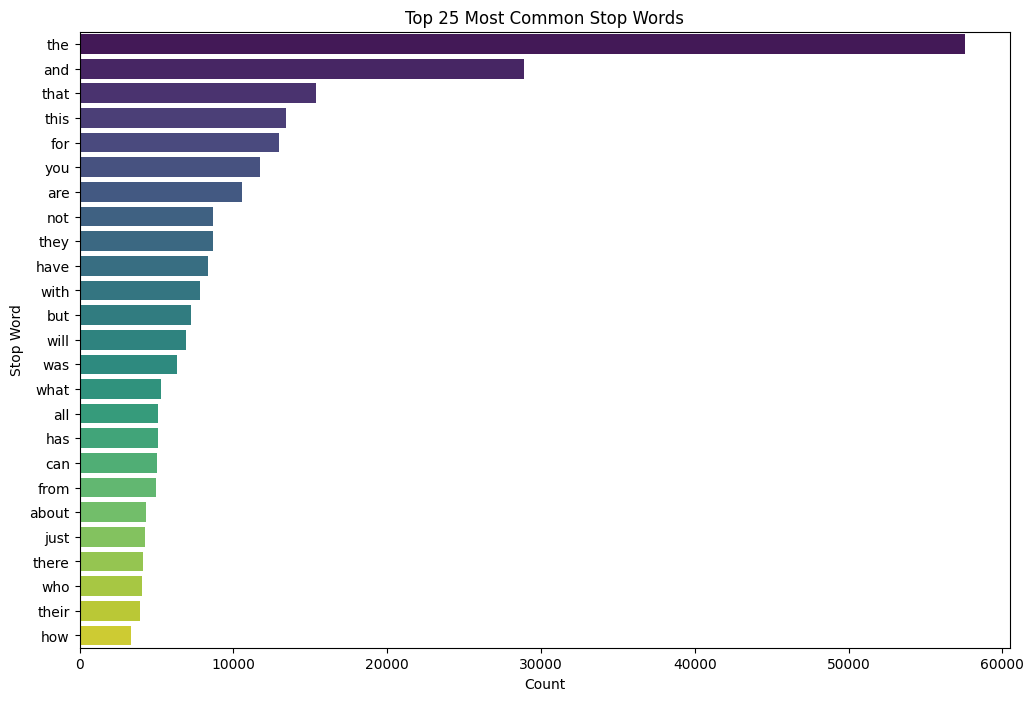

In [76]:
# Identify and count the most common stop words used in the dataset
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_stop_words = Counter(all_stop_words).most_common(25)
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

In [77]:
# Calculate the number of characters in each comment
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [78]:
# Statistical summary of comment character lengths
df['num_chars'].describe()

count    36793.000000
mean       181.831843
std        359.556617
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [79]:
from collections import Counter

all_text = ' '.join(df['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [80]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], shape=(1378,), dtype=object)

In [81]:
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [83]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment

df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
29281,feel bro,0,2,0,8,0
25125,harnessing yuva shakti create ruckus,0,5,0,36,0
4552,all the temples india open their vaults this y...,0,16,6,92,0
28716,there are going lot people this press conferen...,0,14,7,77,0
13521,just ban uncontrolled and unregulated cattle t...,0,22,5,158,0


In [84]:
df['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\Vipul Goel\AppData\Local\Temp\ipykernel_12284\3566695917.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


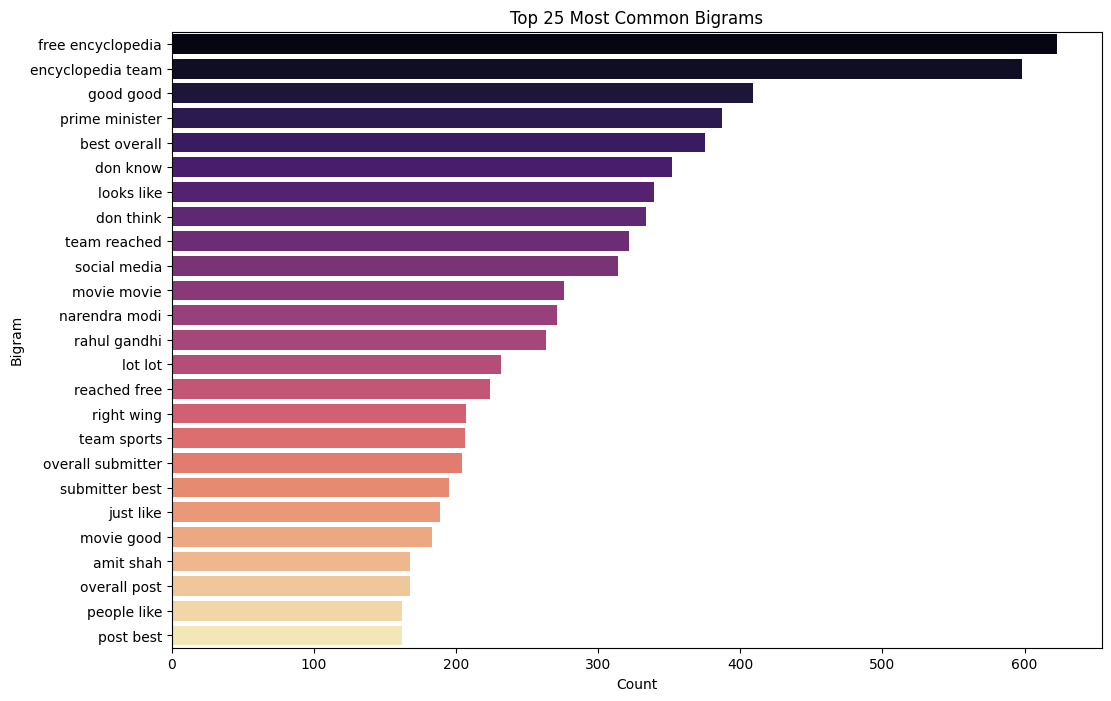

In [87]:
# Identify the most frequent bigrams (2-word phrases)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['clean_comment'])
count_values = bigrams.toarray().sum(axis=0)
ngram_list = cv.get_feature_names_out()
top_25_bigrams_df = pd.DataFrame(sorted([(count_values[i], ngram_list[i]) for i in range(len(ngram_list))], reverse=True)[:25], columns=['count', 'bigram'])

# Plot the top bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Bigrams in Comments')
plt.show()

C:\Users\Vipul Goel\AppData\Local\Temp\ipykernel_12284\3438418122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


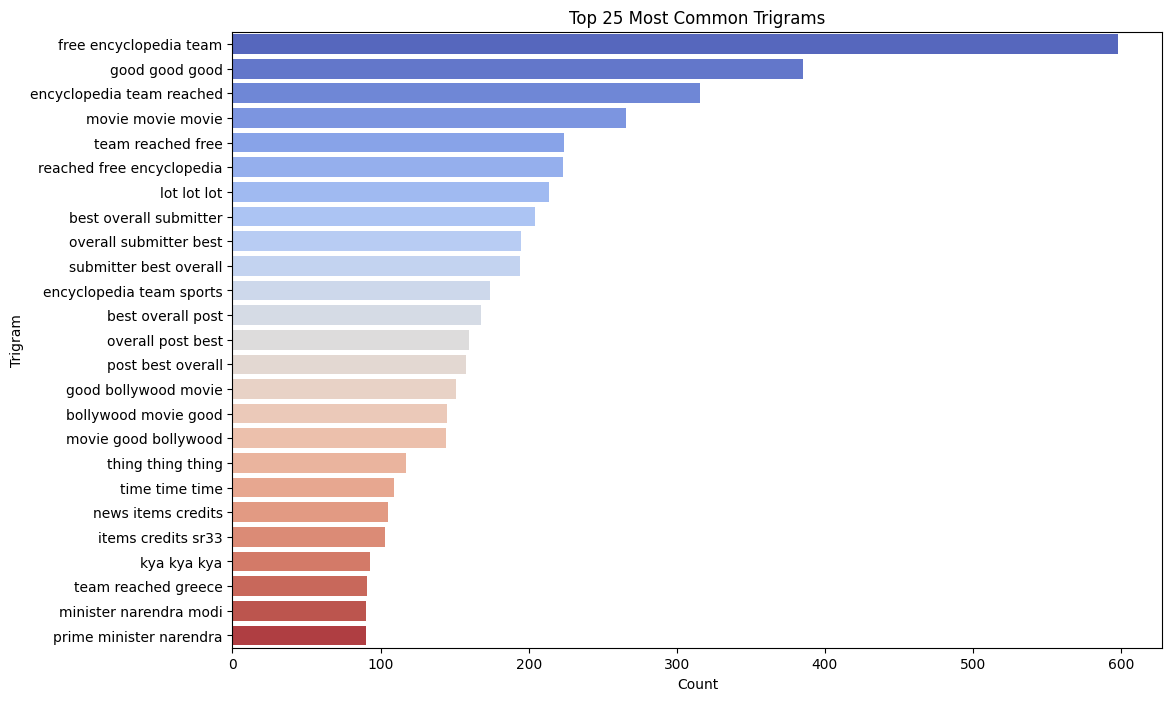

In [88]:
# Get the top 25 trigrams
top_25_trigrams = get_top_ngrams(df['clean_comment'], 3, 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the counterplot for the top 25 trigrams
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [89]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [90]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency'])

# Sort the DataFrame by frequency in descending order
char_frequency_df = char_frequency_df.sort_values(by='frequency', ascending=False)

# Visualize the top 20 most common characters
plt.figure(figsize=(12, 6))
sns.barplot(data=char_frequency_df.head(20), x='frequency', y='character', palette='coolwarm')
plt.title('Top 20 Most Frequent Characters')
plt.show()

   character  frequency
6               1090821
12         e     666610
13         t     491287
1          a     481134
3          i     401388
9          n     388465
7          o     379908
17         s     355279
8          r     331425
10         h     296748
4          l     250104
14         d     221980
18         u     170377
22         c     167821
2          m     155561
16         p     135139
21         g     132927
5          y     115420
25         w     110522
24         b      88199


### Detailed Analysis: Character Frequency

The character frequency analysis reveals:
- **Vowel Dominance**: Vowels like 'e', 'a', 'i', 'o' are highly frequent, consistent with standard English text.
- **Spacing**: The space character is the most frequent, which is typical for sentence structures.
- **Cleanliness Verification**: The low frequency of special characters (after cleaning) indicates a successful initial preprocessing step.

In [91]:
df.head(10)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0
5,you should all sit down together and watch the...,-1,23,9,145,0
6,was teens when discovered zen meditation was t...,1,155,58,963,0
7,jesus was zen meets jew,0,5,1,23,0
8,there are two varieties christians dogmatic th...,-1,82,30,552,0
9,dont worry about trying explain yourself just ...,1,31,13,192,0


In [92]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'no', 'however', 'yet'}

# Remove the stop words from the clean_comment column retaining the essential ones
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [95]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [96]:
# Lemmatizer is used to bring the verb into its root form
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

[nltk_data] Downloading package wordnet to C:\Users\Vipul
[nltk_data]     Goel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


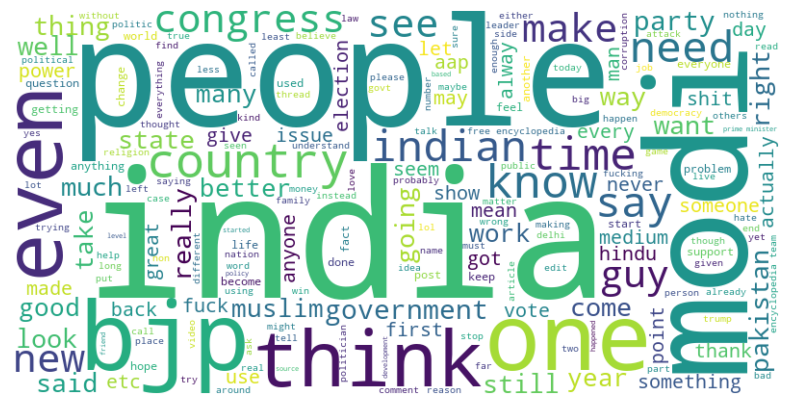

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(df['clean_comment'])

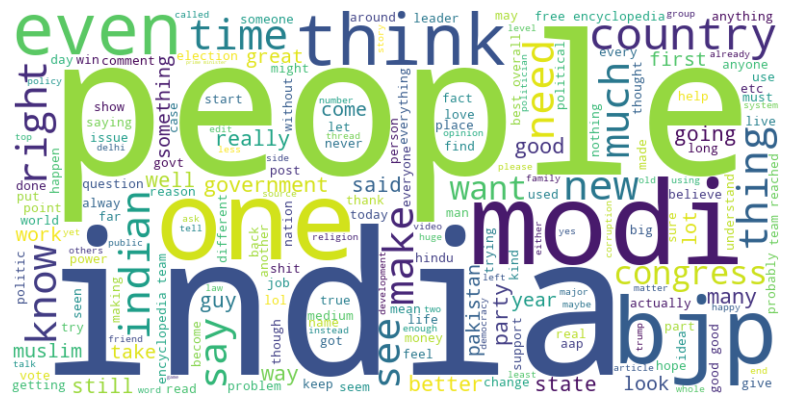

In [99]:
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

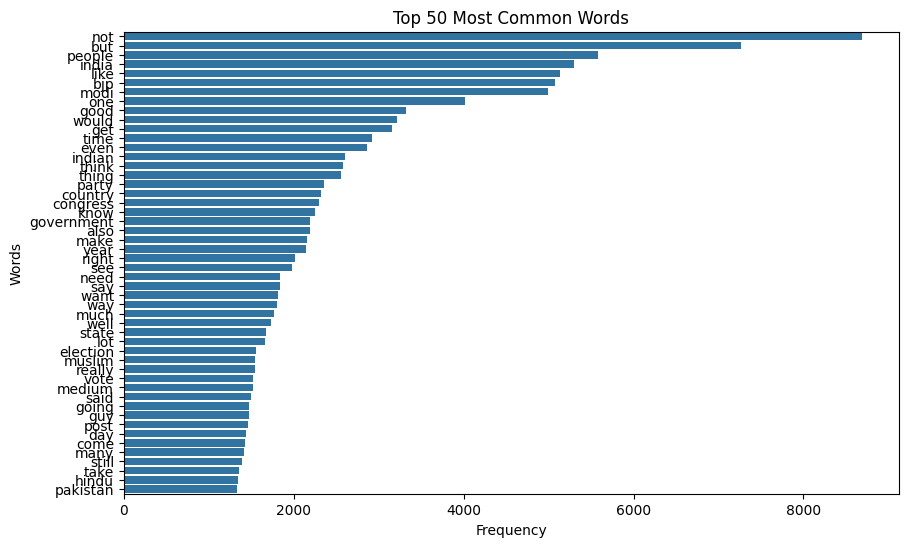

In [102]:
def plot_top_n_words(df, n=20):
    """
    Plot the top n most frequent words in the dataset.
    """
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top n most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Common Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

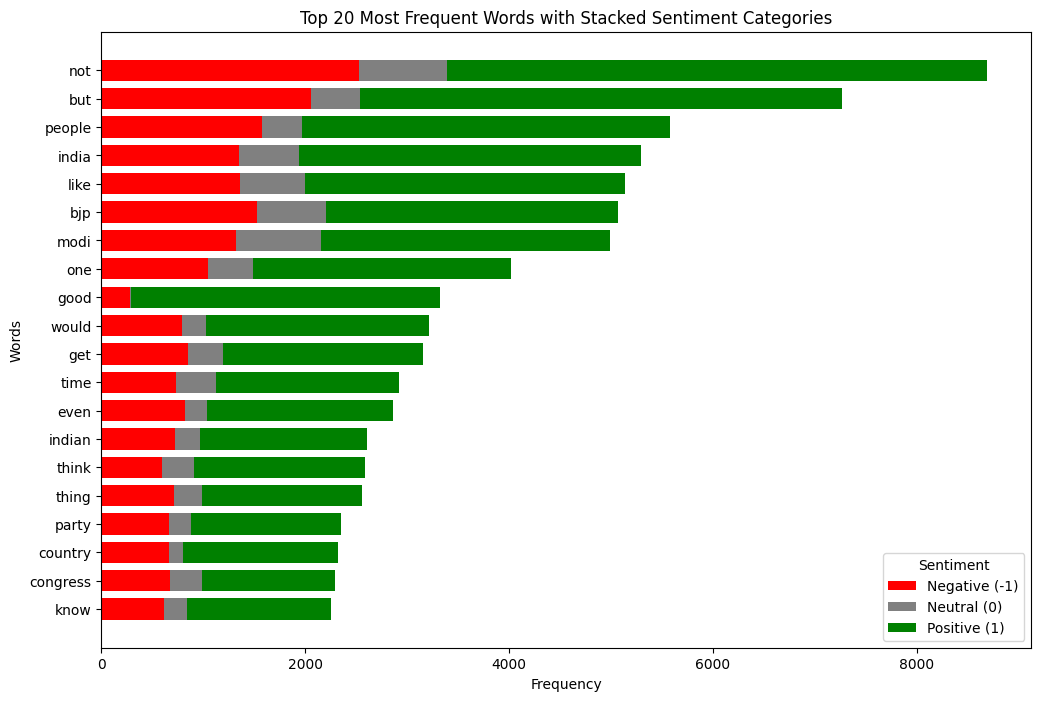

In [103]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)